#Нейронные сети

##Искусственный нейрон

На лекции по **логистической регрессии** мы научились решать базовую задачу: из заданного набора входных данных составлять линейную комбинацию:

$$f(x) = \sum_{i=1}^n w_i x_i,$$

а на её основе предсказывать число в интервале от $0$ до $1$:

$$p = \frac{1}{1+e^{-f(x)}}$$


То есть мы получили нечто, преобразующее информацию в ответ да/нет. Именно так устроен **нейрон мозга**: на вход через дендриты он получает набор электрических импульсов, анализирует их, в результате чего либо пропускает сигнал дальше через терминал (терминаль), либо нет.

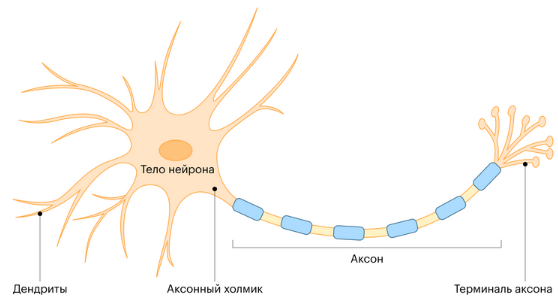

Первая модель искусственного нейрона была предложена учёными **МакКаллоком и Питтсом** в 1943 году, причём для перехода от линейной комбинации к положительной $1$ или отрицательной $-1$ метке использовала простой пороговый метод с некоторым пороговым значением $\alpha$:

$$p = sign(\sum_{i=1}^n w_i x_i - \alpha)$$

Здесь $sign$ — операция получения знака. Для положительной величины она даёт $1$, для отрицательной $-1$. Если сумма больше порога, то метка положительная. Иначе отрицательная.


##Перцептрон Розенблатта

Как мы выяснили на лекции по решающим деревьям, классические методы обучения вроде градиентного спуска неприменимы к пороговым функциям. Первая обучаемая модель была предложена **Фрэнком Розенблаттом** в 1957–1960 годах и называется простым **перцептроном**. Схема перцептрона изображена ниже.

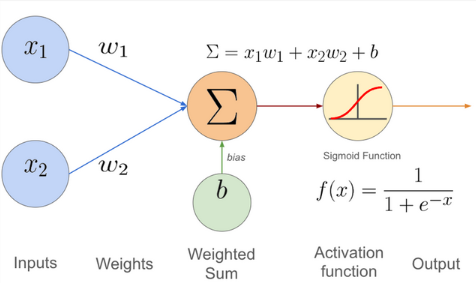

Перцептрон принимает на вход набор признаков, умножает их на веса и считает взвешенную сумму со сдвигом:

$$z = f(x) = \sum_{i=1}^n w_i x_i + b$$

Вычисленная сумма передаётся в функцию, преобразующую полученное число в значение от $0$ до $1$. Такая функция называется **функцией активации**. Один из её примеров — сигмоида:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

##Нейронные сети

На занятии по линейной регрессии мы выяснили, что существенный её минус в определении — мы учитываем только **линейные соотношения между данными**. Для получения нелинейности признаков необходимо изменять их и комбинировать, то есть производить $feature\ engineering$.

Притом неочевидно, как правильно нужно нелинейно преобразовывать данные, чтобы сделать их информативнее. Зато можно повысить **нелинейность самой модели**, то есть объединять нейроны в разные комбинации, то есть **нейронную сеть**.

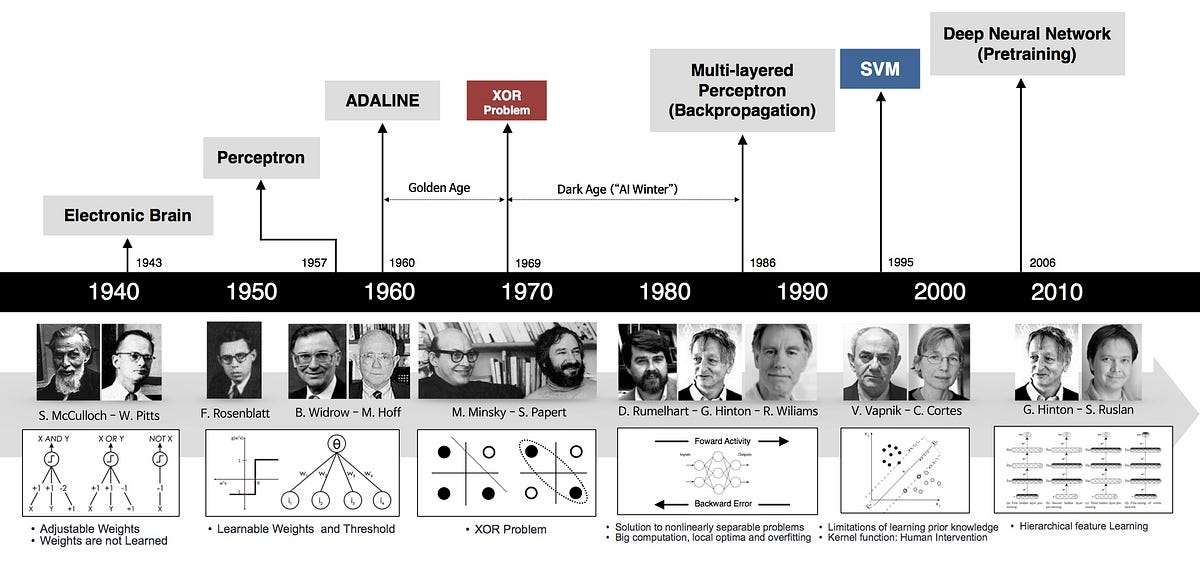

История нейронных сетей весьма длинная, разные учёные предлагали разные подходы к соединению нейронов в комбинации. Например, на схеме ниже представлена сеть **Хопфилда**, где вход каждого из трёх нейронов является также и выходом для каждого из них и все нейроны иерархически равны между собой.

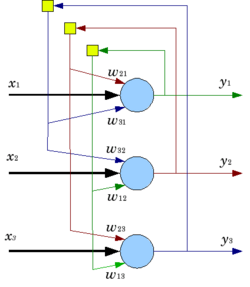

В свою очередь Розенблатт предложил объединять перцептроны в последовательные слои, то есть создавать **многоуровневый перцептрон** $(multilayer\ perceptron$, $MLP)$.

Многоуровневый перцептрон состоит из **входного** слоя, размер которого равен числу признаков $x_i$. Каждый из выходов нейронов входного слоя соединяется с каждым из входов следующего, **скрытого** слоя. Скрытых слоёв обычно несколько, все они соединены между собой всеми входами и выходами. После скрытых слоёв сигнал попадает на **выходной** слой — нейросеть выдаёт $predict$.

Таким образом, данные распространяются по нейросети строго в прямом направлении, что называется **прямым ходом** $(forward\ pass)$.

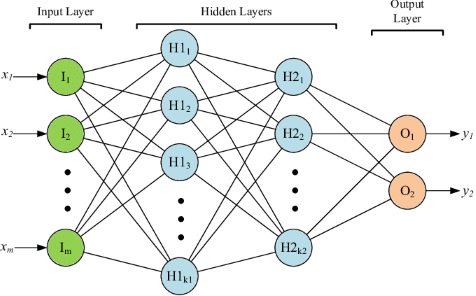

Нейронная сеть, в которой каждый нейрон в одном слое связан со всеми нейронами следующего слоя, называется **полносвязной нейронной сетью** ($Fully\ Connected\ Neural\ Network$, $FC\ NN$). Нейросеть с большим количеством скрытых слоёв называется **глубокой** ($deep$).

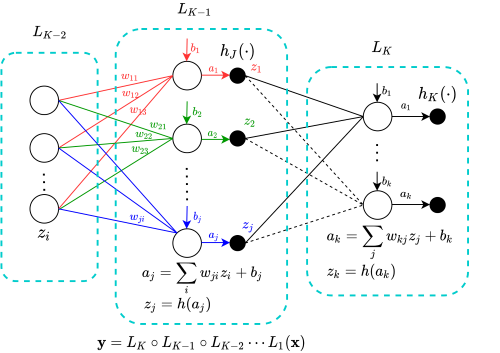

Сначала вычисляются значения на первом скрытом слое на основе данных из входного. Когда посчитаны все величины на первом скрытом, рассчитываются на втором и так далее до выходного.

Отсюда получаем значительный плюс полносвязной сети. Преобразование данных всей нейронной сетью можно представить как **последовательность преобразований** каждым отдельным $n$-м слоем $L_n$ от $1$-го до $K$-го слоя:

$$\hat y = L_{K} \circ L_{K-1} \circ L_{K-2} \cdots L_{1}(x)$$

Именно с такой архитектурой мы будем работать в рамках данного занятия.

## Обучение полносвязной нейросети

Обучение всё так же сводится к **поиску наилучших весов** $w$, но теперь для каждого нейрона. Производится поиск через минимизацию функции ошибки (потерь, $loss$) между предсказанием сети и целевым значением на обучающей выборке, это могут быть описанные ранее $MAE$, $MSE$, $BCE$ и прочие.

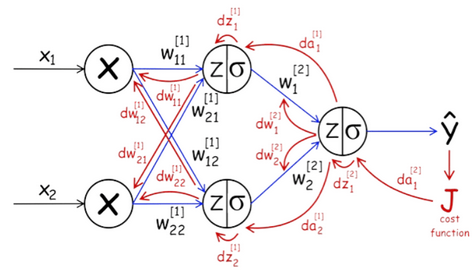

Обучение производится методом **обратного распространения ошибки** ($backpropagation$). Его алгоритм:

1. При **прямом ходе** вычисляется значения на всех промежуточных слоях и итоговый предикт, сохраняем все эти значения.
2. Вычисляется значение функции **ошибки** на основе известного и предсказанного значений.
3. Идём **обратным ходом** по слоям:
    1. Вычисляем **градиенты** на последнем $K$-м слое, **сохраняем градиенты в памяти**.
    2. Идём на **предыдущий** $K-1$-й слой, вычисляем на нём градиентны.
    3. Аналогично повторям, движемся до $1$-го.
4. Обновляем веса каждого нейрона сети. Средство обновления весов называют **оптимизатором** ($optimizer$). Пример оптимизатора — **градиентный спуск**:

$$w^{(t)} = w^{(t-1)} - lr \cdot gradient (w^{(t-1)})$$

5. На этой эпохе веса обновлены, **возвращаемся** к шагу 1.

##Функции активации

Познакомимся с основными функциями активации, выведем для них графики. Общая вспомогательная функция построения графика на отрезке от $-5$ до $5$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_activation(func, name, x_range=(-5, 5)):
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = func(x)

    plt.figure(figsize=(5, 2))
    plt.plot(x, y, lw=2)
    plt.axhline(0, color='black', linewidth=0.7)
    plt.axvline(0, color='black', linewidth=0.7)
    plt.title(name)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True, linestyle=":", linewidth=0.6)
    plt.show()

###Sigmoid

**Сигмоида** — одна из самых ранних и интуитивно понятных функций активации. Она переводит любое вещественное число в интервал $(0, 1)$, благодаря чему естественным образом интерпретируется как вероятность. Именно по этой причине сигмоида широко использовалась в логистической регрессии и в первых нейронных сетях.

Однако при больших по модулю значениях аргумента функция быстро **насыщается**, то есть однозначано предсказывает $0$ и $1$, а не число из диапазона. Это приводит к тому, что градиент становится близким к нулю и веса при обучении почти не изменяются.

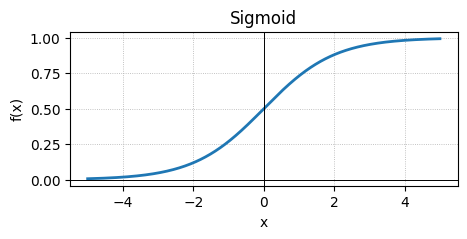

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plot_activation(sigmoid, "Sigmoid")

###ReLU

**ReLU** ($Rectified\ Linear\ Unit$) — простейшая по формуле, но одна из самых важных функций активации в современной практике. Она обнуляет все отрицательные значения и оставляет положительные без изменений. За счёт этого ReLU сохраняет ненулевой «наклон» на положительной полуоси, что делает обучение нейросетей быстрым и устойчивым.

Именно появление ReLU стало одним из ключевых факторов успеха **глубоких** нейронных сетей. Основной недостаток этой функции — возможность появления мёртвых нейронов, которые из-за неудачных весов всегда получают отрицательный вход и перестают участвовать в обучении.

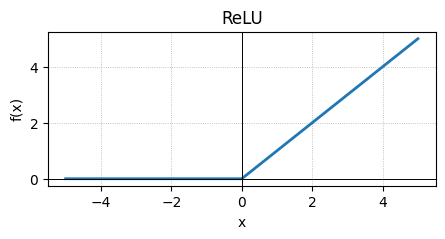

In [ ]:
def relu(x):
    return np.maximum(0, x)

plot_activation(relu, "ReLU")

###LeakyReLU

**LeakyReLU** является простой модификацией ReLU, призванной устранить проблему мёртвых нейронов. В отличие от ReLU, она сохраняет небольшой наклон и в отрицательной области. Это означает, что даже если входное значение отрицательно, нейрон всё равно получает небольшой сигнал для обновления своих весов.

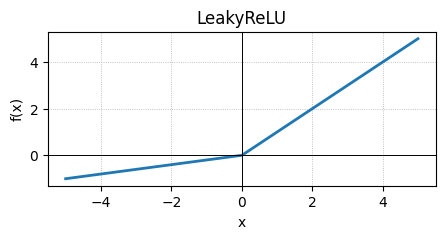

In [ ]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

plot_activation(lambda x: leaky_relu(x, 0.2), "LeakyReLU")

###ELU

**ELU** ($Exponential\ Linear\ Unit$) делает отрицательную часть функции не линейной, а экспоненциальной, при этом положительная часть остаётся линейной. Такое поведение приводит к тому, что средние значения активаций оказываются ближе к нулю, поэтому ELU более стабильна, чем ReLU и LeakyReLU.

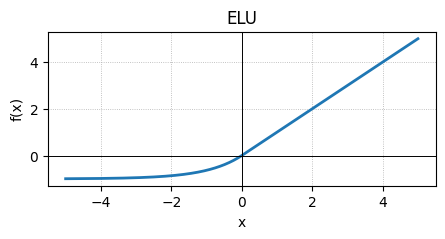

In [ ]:
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

plot_activation(lambda x: elu(x, 1.0), "ELU")

###Softplus

**Softplus** можно рассматривать как гладкую версию ReLU. Формально она всегда положительна и дифференцируема во всех точках, что делает её привлекательной с теоретической точки зрения. По форме Softplus напоминает ReLU, но без резкого излома в нуле.

Несмотря на это, на практике Softplus используется реже, так как её **вычисление** дороже, а преимущества по качеству обучения по сравнению с ReLU часто оказываются несущественными.

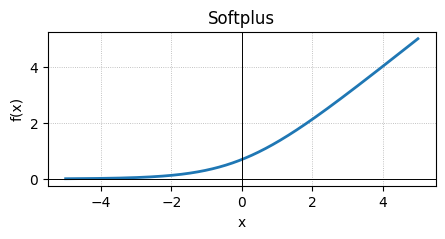

In [ ]:
def softplus(x):
    return np.log1p(np.exp(x))

plot_activation(softplus, "Softplus")

###GELU

**GELU** ($Gaussian\ Error\ Linear\ Unit$) — более современная функция активации, активно используемая в трансформерах и крупных языковых моделях вроде ChatGPT или BERT, которые мы обсудим на следующем занятии.

Идея заключается в том, чтобы не просто отсекать отрицательные значения, а **взвешивать вход** в зависимости от его величины, используя аппроксимацию гауссовского распределения. В результате малые и отрицательные значения подавляются мягко, а большие положительные проходят почти линейно. GELU даёт небольшое, но явное повышение стабильности относительно ReLU.

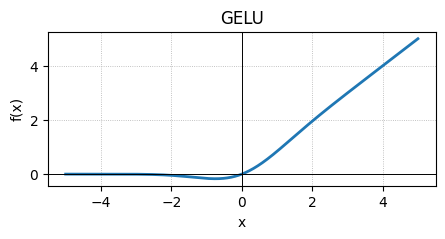

In [ ]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(
        np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)
    ))

plot_activation(gelu, "GELU")

##Инициализация весов

Прежде чем обучать нейросеть, необходимо выбрать начальное приближение для весов $w$. Начальные значения повлияют на дальнейшее обучение, поэтому к их выбору нужно подходить с умом. Общая функция для построения гистограммы распределения весов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_weight_initialization(weights, title, bins=30):
    plt.figure(figsize=(5, 2))
    plt.hist(weights, bins=bins)
    plt.title(title)
    plt.xlabel("weight value")
    plt.ylabel("count")
    plt.grid(True, linestyle=":")
    plt.show()

n = 1000

###Инициализация нулём

**Инициализация нулём** является наглядным примером того, как неправильный выбор начальных весов разрушает обучение. Если все веса слоя равны нулю, каждый нейрон получает одинаковый вход и производит одинаковый выход. При вычислении ошибки и её распространении назад все нейроны получают одинаковые поправки к весам.

В результате после обновления **веса остаются одинаковыми**, и ситуация повторяется снова и снова. Такой слой теряет смысл многонейронной структуры и фактически ведёт себя как один нейрон, независимо от того, сколько параметров в нём заложено. Аналогичная ситуация при инициализации весов любой **константой**.

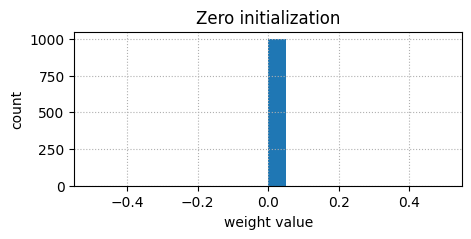

In [ ]:
weights_zero = np.zeros(n)
plot_weight_initialization(weights_zero, "Zero initialization", bins=20)

###Случайная инициализация значениями из нормального распределения

**Случайная инициализация** разрушает симметрию между нейронами и позволяет каждому из них начать обучение по-своему. Когда веса выбираются случайно около нуля, разные нейроны реагируют на разные части входных данных, и слой начинает извлекать более сложные зависимости.

Однако важно понимать, что важны не только случайность, но и **масштаб** этих значений. Если начальные веса слишком малы, сигналы на выходе слоёв становятся слабыми, и обучение идёт медленно. Если же веса слишком велики, выходы слоёв могут становиться чрезмерно большими, что затрудняет стабильное обучение.

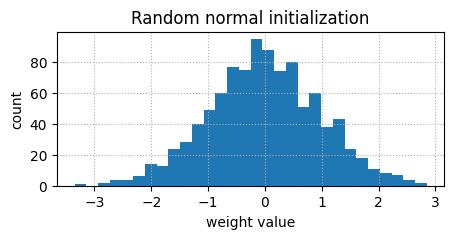

In [ ]:
weights_normal = np.random.normal(0, 1, n)
plot_weight_initialization(weights_normal, "Random normal initialization")

###Инициализация Xavier / Glorot

Инициализация **Xavier** была предложена для того, чтобы автоматически подбирать разумный масштаб начальных весов с учётом размеров слоёв, чтобы значения весов не были ни слишком большими, ни слишком маленькими по сравнению с количеством входных и выходных нейронов. Благодаря этому сигналы, проходящие через сеть, сохраняют сопоставимый уровень на разных слоях, а обучение становится более стабильным.

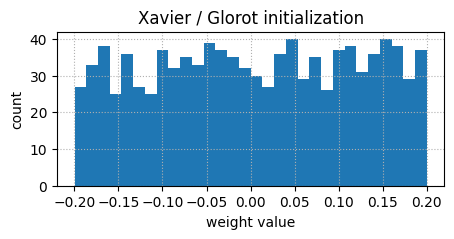

In [ ]:
fan_in = 100
fan_out = 50
limit = np.sqrt(6 / (fan_in + fan_out))
weights_xavier = np.random.uniform(-limit, limit, n)
plot_weight_initialization(weights_xavier, "Xavier / Glorot initialization")

###Инициализация He / Kaiming

Инициализация **He** (названа по фамилии учёного) была разработана специально для сетей с ReLU и похожими функциями активации. Поскольку ReLU полностью отбрасывает отрицательные значения, часть нейронов в каждом слое оказывается неактивной. Это означает, что эффективное число работающих сигналов уменьшается, и обычные схемы инициализации могут давать слишком слабый выход.

Инициализация He **увеличивает разброс** начальных весов по сравнению с Xavier, компенсируя обнуление части сигналов и помогая сохранить стабильный масштаб активаций при прохождении через сеть.

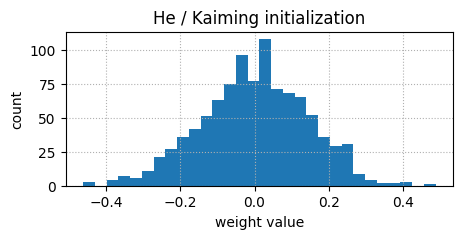

In [ ]:
scale = np.sqrt(2 / fan_in)
weights_he = np.random.normal(0, scale, n)
plot_weight_initialization(weights_he, "He / Kaiming initialization")

##Ограничения на веса

Помимо выбора начальных значений весов, иногда вводятся дополнительные **ограничения** ($constraints$), которые применяются уже **в процессе обучения**.

Например, веса могут принудительно нормироваться или ограничиваться заданным диапазоном после каждого шага оптимизации. Это помогает избежать чрезмерного роста параметров и делает обучение более устойчивым.

Для иллюстрации инициализируем веса и ограничим их строго значением $-3$ снизу и $3$ сверху.

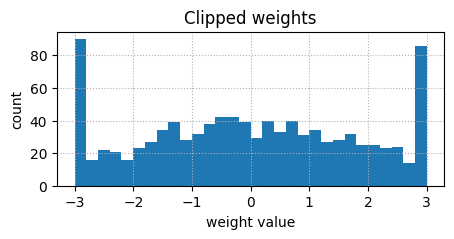

In [ ]:
weights_random = np.random.normal(0, 2, n)
weights_clipped = np.clip(weights_random, -3, 3)
plot_weight_initialization(weights_clipped, "Clipped weights")

##Регуляризация

На лекции по линейной регрессии мы обсудили, что, если между признаками существует линейная связь, модель будет вести себя нестабильно. Для решения этой проблемы применяют **регуляризацию**. Вместо того чтобы минимизировать только ошибку предсказания, мы вводим дополнительное слагаемое, равное норме вектора весов $w$, умноженной на некоторое число $\lambda>0$, являющееся ещё одним гиперпараметром:

$$ \sum_{j=1}^N||y_{true}^j - y_{pred}^j|| + \lambda\sum_{i=1}^n||w_i||\rightarrow min $$

Такой подход снижает влияние выбросов и смещений в тренировочных данных, ограничивает рост весов, а веса, соответствующие несущественным для предсказания признакам, устремляет к нулю.

## Dropout

**Dropout** — техника, при которой во время обучения выключают часть, обычно $20 \%$, случайно выбранных нейронов, на каждой итерации цикла обучения свой случайный набор. Это заставляет сеть не полагаться на узкий набор нейронов, оставляя другие неактивными, а равномерно обучать все части. После обучения нейросети все нейроны включаются обратно.

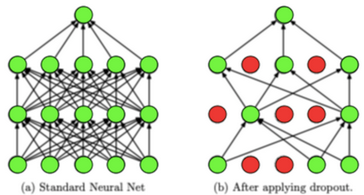

##Библиотека Pytorch

`PyTorch` — современная библиотека с открытым исходным кодом для обучения нейросетей на `Python`. История модуля берёт начало в 2001 году, когда была выпущена библиотека `Torch`, реализованная на `C++`. С 2018 года поддержка оригинального проекта на `C++` была прекращена, проект полностью переехал на `Python`.

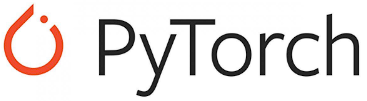

Сейчас у `Pytorch` имеются аналоги вроде `Tensorflow`, однако они находятся в состоянии ощутимого устаревания. Например, в декабре 2025 года библиотека `transformers` для разработки нейронных сетей трансформеров (например, `ChatGPT`) отказалась ото всех бэкендов, кроме `Pytorch`. Перечислим и другие преимущества, помимо актуальности.

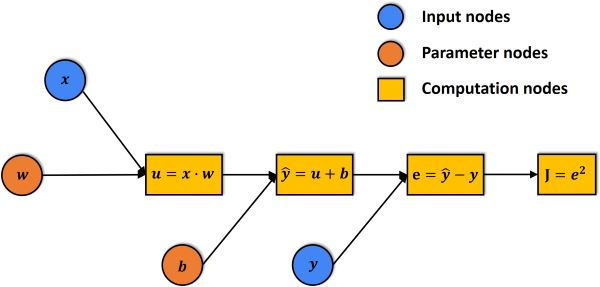


Для вычислений используется **динамический вычислительный граф**, состоящий из переменных и операций. Вычисления строятся на лету в момент выполнения кода, граф можно изменять в процессе исполнения кода.

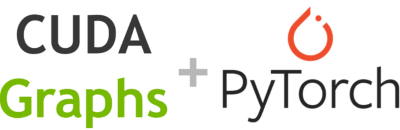


Обучение нейронных сетей требует больших вычислительных мощностей, в частности запуска на **видеокарте**. В `Pytorch` достаточно задать переменную `device`, равную значению `CUDA`, и указывать сохранение данных на `device`.

При оптимизации весов требуется считать **градиенты**. В `Pytorch` имеется встроенный инструмент для автоматического вычисления градиентов `autograd`.

##Тензоры

###Примеры инициализации

`PyTorch` оперирует **тензорами** — объектами типа `torch.Tensor`. Они реализуют и расширяют функционал встроенных в `Python` списков и массивов `numpy`. Импортируем модуль и приведём примеры инициализации тензоров.

In [1]:
import torch
import numpy as np

Из списка:

In [3]:
a = torch.tensor([1.0, 2.0, 3.0])
a, a.shape

(tensor([1., 2., 3.]), torch.Size([3]))

Из массива `numpy`:

In [4]:
b_np = np.array([[1., 2.], [3., 4.]])
b = torch.from_numpy(b_np)
b, b.shape

(tensor([[1., 2.],
         [3., 4.]], dtype=torch.float64),
 torch.Size([2, 2]))

Линейно распределённые значения:

In [5]:
c = torch.linspace(0, 1, steps=5)
c

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

Нормально распределённые значения:

In [7]:
mean = 0.0
std_dev = 1.0
d = torch.normal(mean, std_dev, size=(3, 4))
d

tensor([[-0.4758,  1.2362, -0.9134,  0.6446],
        [ 1.5873, -1.6580, -0.5392, -0.2142],
        [ 0.5683,  0.5233,  0.6130,  0.8185]])

###CUDA

Для работы с видеокартой используется следующий код:

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


Для переноса переменных из библиотеки `Pytorch` на нужно устройство нужно использовать метод `.to()` или указывать параметр `device` при инициализации.

In [9]:
t = torch.randn(3, 4)
t_gpu = t.to(device)
t2 = torch.zeros(2, 2, device=device)
t_gpu, t2

(tensor([[ 0.2774, -1.0977,  2.1403,  0.8975],
         [-1.0901,  1.8524,  0.1560, -0.5781],
         [ 0.2049,  0.7237,  0.6312,  0.4938]]),
 tensor([[0., 0.],
         [0., 0.]]))

###Добавление и удаление осей

Часто для организации обучающих данных в виде небольших наборов, то есть батчей, необходимо добавлять дополнительные оси. Для этого реализован метод `unsqueeze`.

In [12]:
x = torch.zeros(5)
x_unsq = x.unsqueeze(0)
x_unsq2 = x_unsq.unsqueeze(2)

print(x)
print(x_unsq)
print(x_unsq2)

tensor([0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0.]])
tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.]]])


Метод `squeeze` удаляет все единичные оси либо только заданную, если указать её номер как аргумент.

In [13]:
x_squeezed = x_unsq2.squeeze()
print(x_squeezed)

tensor([0., 0., 0., 0., 0.])


###Вычисление градиентов

Напомним, что **производная** показывает скорость изменения функции относительно аргумента и даёт угловой коэффициент касательной прямой к графику функции. В случае нескольких переменных производная называется градиентом.

Приведём пример для одномерного случая — параболы $y=x^2$. Производная для неё равна $y'=2x$. Проведём касательную в точке $x=1$.

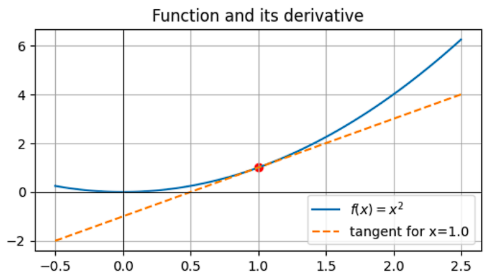

`autograd` — механизм автоматического дифференцирования выражений с переменными, например для функции $x^2$ он автоматически вычислит производную $2x$.

Если для тензора при инициализации указать `requires_grad=True`, `PyTorch` автоматически построит вычислительный граф, то есть запоминит последовательность операций. При вызове `.backward()` библиотека пройдётся по этому графу в обратном порядке и вычислит градиенты для всех тензоров, на которые зарегистрирован `requires_grad`, записав результат в поле `.grad`.


In [49]:
x = torch.tensor([1.0], requires_grad=True)
y = x**2
y.backward()
print("x =", x)
print("y = x ** 2 =", y)
print("dy/dx =", x.grad)

x = tensor([1.], requires_grad=True)
y = x ** 2 = tensor([1.], grad_fn=<PowBackward0>)
dy/dx = tensor([2.])


Метод `.backward()` применим лишь к скалярам, то есть величинам в виде одного числа. Поэтому векторные выражения нужно сводить к скалярной величине, например, через `.sum()`.

In [48]:
x = torch.linspace(-1.0, 1.0, steps=5, requires_grad=True)
print("x ** 2 = ", x ** 2)
y = (x ** 2).sum()   # скаляр
print("y = ", y)
y.backward()
print("x =", x)
print("x.grad = ", x.grad)

x ** 2 =  tensor([1.0000, 0.2500, 0.0000, 0.2500, 1.0000], grad_fn=<PowBackward0>)
y =  tensor(2.5000, grad_fn=<SumBackward0>)
x = tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000], requires_grad=True)
x.grad =  tensor([-2., -1.,  0.,  1.,  2.])


Важно отметить, что градиенты аккумулируются в `tensor.grad`, то есть при повторном вызове `.backward()` они суммируются.

In [44]:
z = (x ** 4).sum()
z.backward()
print("x =", x)
print("x.grad = ", x.grad)

x = tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000], requires_grad=True)
x.grad =  tensor([-6.0000, -1.5000,  0.0000,  1.5000,  6.0000])


Для обнуления градиентов вызывают `optimizer.zero_grad()` или `param.grad.zero_()`.

In [46]:
x.grad.zero_()
print("x =", x)
print("x.grad = ", x.grad)

x = tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000], requires_grad=True)
x.grad =  tensor([0., 0., 0., 0., 0.])


Приведём функционал для извлечения переменных из `torch` в стандартные типы данных

In [47]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x * 2

scalar_value = y[0].item()  # получаем первое значение
y_detached = y.detach() # отсоединяем y от графа вычислений
numpy_array = y_detached.cpu().numpy() # перенос с видеокарты на процессор

##Игрушечная задача. Бинарная классификация нелинейно разделённых объектов

###Постановка задачи

Рассмотрим **точки** на плоскости, разделённые **синусоидой**. Класс точки выше синусоиды обозначим за $1$, а ниже — $0$. Наша цель — построить полносвязную нейросеть, которая по координатам $(x,y)$ предсказывает класс. Ниже сгенерируем и визуализируем данные.

In [50]:
torch.manual_seed(42)

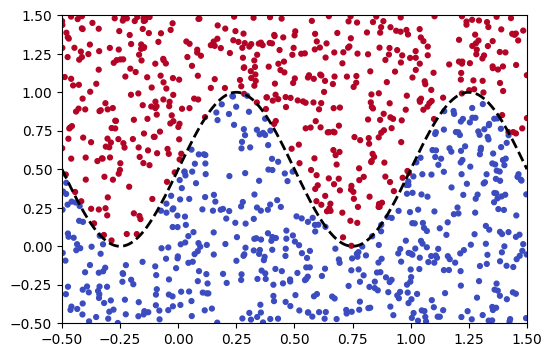

In [163]:
def sine_function(x):
    return 0.5 * (torch.sin(2.0 * torch.pi * x) + 1.0)

nsamples = 1000
X = (torch.rand(nsamples, 2) * 2.0) - 0.5
y = (X[:, 1] > sine_function(X[:, 0])).int()

sine_x = torch.linspace(-0.5, 1.5, 500)
sine_y = sine_function(sine_x)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy(), s=12, cmap='coolwarm')
plt.plot(sine_x.numpy(), sine_y.numpy(), c='k', ls='--', lw=2)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()


Разбиение на тренировочную, валидационную и тестовую выборки в соотношении `80/10/10`:

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

###Решение задачи

Преобразуем данные в датасет `torch`. Это шаблон, удобный для хранения данных в формате признаков и их меток.

In [165]:
from torch.utils.data import TensorDataset

train_ds = TensorDataset(X_train.detach().clone(), y_train.detach().clone())
test_ds  = TensorDataset(X_test.detach().clone(), y_test.detach().clone())

Для пакетирования, то есть подгрузки данных и группировки их в батчи, используют `DataLoader`.

In [166]:
from torch.utils.data import DataLoader

batch_size = 100
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False)

Инициализируем типовой **класс полносвязной модели** для решения поставленной задачи через `torch.nn.Module`. Необходимые функции активации и слои реализованы в виде `nn.ReLU()`, `nn.LeakyReLU()`, `nn.Tanh()`, `nn.GELU()`, `nn.Dropout` и т. д. Веса инициализируются автоматически, по умолчанию выбран метод Xavier. Слои поместим в контейнер `nn.Sequential`, который автоматически соединит все последовательные входы и выходы.

In [167]:
import torch.nn as nn

class FCNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x).squeeze(dim=-1)

Инициализируем пример такой модели с 16 скрытыми нейронами, выведем информацию через `torchsummary`.

In [85]:
!pip install -q torchsummary

In [168]:
from torchsummary import summary

model = FCNet(input_dim=2, hidden_dim=16)
summary(model, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              Tanh-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
           Sigmoid-4                    [-1, 1]               0
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Реализуем функцию для цикла обучения. Сперва импортируем модуль с оптимизаторами и модуль для `progressbar`

```python
import torch.optim as optim
from tqdm.notebook import tqdm
```

Функция будет принимать на **вход** модель, инициализированную аналогично примеру выше. Загрузчики тренировочных и валидационных данных. Количество эпох, то есть число полных проходов нейросети по всем обучающим данным. Укажем скорость обучения `lr` и `weight_decay`, ранее мы называли его параметром $\lambda$ регуляризации.

```python
def train_model(model, train_loader, val_loader, epochs=50, lr=1e-3, weight_decay=1e-4):
```

Перенесём модель на устройство. Как функцию потерь будем использовать `nn.BCELoss()`. Оптимизатором примем `Adam` — стандарт индустрии, показывающий высокую стабильность, в отличие от градиентного спуска и прочих.

```python
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  
```

Чтобы потом рассмотреть процесс обучения, то есть, как модель сходилась к обученному состоянию, будем сохранять потери на каждой эпохе в цикле обучения.

```python
    train_losses, val_losses = [], []
    for epoch in tqdm(range(epochs), desc="Training epochs"):  
```

Переводим модель в режим обучения. Проходимся по всем батчам. Для каждого делаем предикт, считаем потери, по ним градиенты, обновляем веса через шаг оптимизатора, увеличиваем суммарный `loss` на текущей эпохе на `loss` от отдельного батча.

```python
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            yb = yb.float()
            optimizer.zero_grad()   
            logits = model(xb)                   
            loss = criterion(logits, yb)        
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0) # размер батча
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
    return train_losses
```

Соберём код воедино и запустим ячейку.

In [208]:
import torch.optim as optim
from tqdm.notebook import tqdm

def train_model(model, train_loader, epochs=50, lr=1e-3, weight_decay=1e-4):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for epoch in tqdm(range(epochs), desc="Training epochs"):
        model.train()
        running_loss = 0.0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            yb = yb.float()
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)  # размер батча
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
    return train_losses


Обучаем 3 модели с разной численностью скрытого слоя, чтобы посмотреть, насколько количество нейронов влияет на предсказание.

In [209]:
hidden_sizes = [1, 4, 20]
models = []
histories = []
for h in hidden_sizes:
    print('\n--- Training model with hidden dim =', h)
    m = FCNet(input_dim=2, hidden_dim=h)
    tr_losses = train_model(m, train_loader, epochs=300, lr=0.1)
    models.append(m)
    histories.append(tr_losses)


--- Training model with hidden dim = 1


Training epochs:   0%|          | 0/300 [00:00<?, ?it/s]


--- Training model with hidden dim = 4


Training epochs:   0%|          | 0/300 [00:00<?, ?it/s]


--- Training model with hidden dim = 20


Training epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Оценим качество работы моделей по метрике `accuracy`. Переводим модель в режим предсказания для проверки работы на тестовых. Так как в таком режиме веса неизменны, отключаем градиенты. Считаем потерю на всех батчах тестовой выборки.

In [210]:
def evaluate_accuracy(model, data_loader):
    model.to(device)
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.to(device), yb.to(device)
            yb = yb.float()
            logits = model(xb)
            preds = (logits > 0.5).float()
            correct += (preds == yb).sum().item()
            total += xb.size(0)
    return correct / total

Все модели показали высокий результат, причём видно, что увеличение числа слоёв приводит к увеличению скора.

In [211]:
for i, m in enumerate(models):
    acc = evaluate_accuracy(m, test_loader)
    print(f"Model with hidden={hidden_sizes[i]} — test accuracy: {acc:.4f}")

Model with hidden=1 — test accuracy: 0.8250
Model with hidden=4 — test accuracy: 0.9500
Model with hidden=20 — test accuracy: 0.9850


Построим графики функций потерь. Видим, что заданного числа эпох хватило, чтобы веса всех 3 моделей стабилизировались.

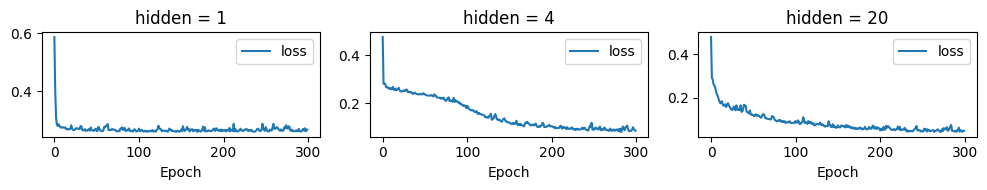

In [216]:
fig, axs = plt.subplots(1, 3, figsize=(10, 2))
for i, tr in enumerate(histories):
    axs[i].plot(tr, label='loss')
    axs[i].set_title(f'hidden = {hidden_sizes[i]}')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()
plt.tight_layout()
plt.show()

Визуализируем, как модель предсказывает границы.

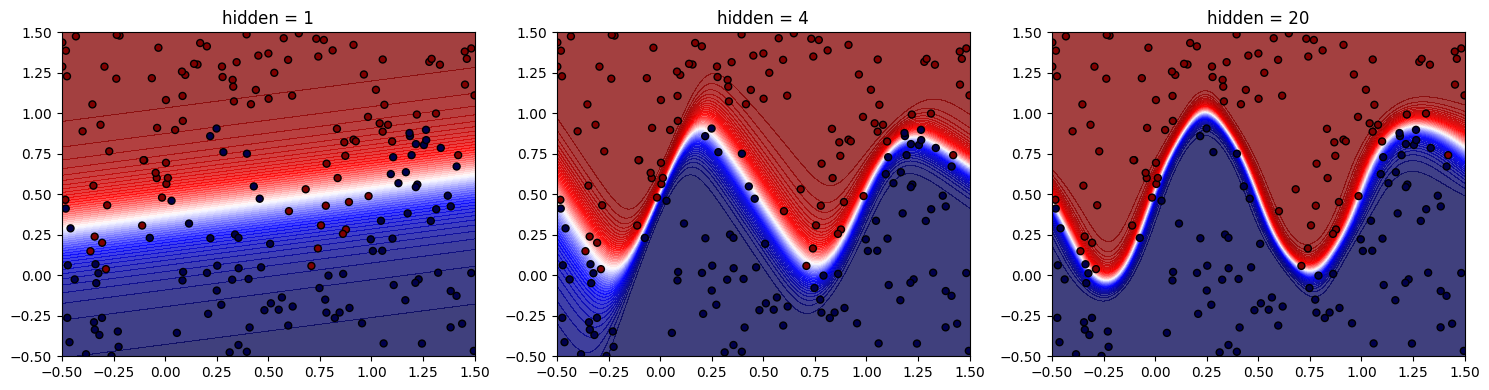

In [224]:
x = np.linspace(-0.5, 1.5, 300)
Xg, Yg = np.meshgrid(x, x)
coords = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
coords_t = torch.tensor(coords, dtype=torch.float32).to(device)

fig, axs = plt.subplots(1, len(models), figsize=(15, 4))

for i, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        logits = model(coords_t)
        probs = logits.cpu().numpy().reshape(Xg.shape)

    axs[i].contourf(Xg, Yg, probs, levels=50, cmap='seismic', alpha=0.75)
    axs[i].scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap='seismic',
        edgecolor='black',
        s=25
    )
    axs[i].set_title(f'hidden = {hidden_sizes[i]}')
    axs[i].set_xlim(-0.5, 1.5)
    axs[i].set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

В первом случае имелся лишь один скрытый нейрон с гиперболическим тангенсом, поэтому имеется лишь одна граница. Во втором использовалось 4 нейрона, поэтому нейросеть проводит линию с 4 изломами. Последняя сеть наиболее умная, проводимая её граница достаточно чёткая и похожая на истинную зависимость.

##Выводы

В ходе занятия мы:

1. Познакомились с подходами к созданию искусственного нейрона.
2. Рассмотрели различные архитектуры нейронных сетей.
3. Изучили метод обратного распространения ошибки.
4. Проанализировали применимость различных функций активации.
5. Рассмотрели хорошие методики машинного обучения: правильную инициализацию весов, их ограничение, регуляризацию функции потерь, dropout.
6. Познакомились с библиотекой `Pytorch` и её основным функционалом.
7. Решили задачу бинарной классификации данных с нелинейной границей.

##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Воронцов, К. В. Мат. модели машинного обучения: искусственные нейронные сети : лекции / К. В. Воронцов. — МФТИ : 21.03.2025. – URL: http://www.machinelearning.ru/wiki/images/e/e1/Voron-ML-ANN-slides.pdf (дата обращения: 01.11.2025).
2. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
3. Нейчев, Р. Тонкости обучения. – Текст : электронный / Р. Нейчев ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/tonkosti-obucheniya (дата обращения: 01.11.2025).
4. Нейчев Р., Синицин Ф. Нейронные сети. – Текст : электронный / Р. Нейчев, Ф. Синицин, С. Федотов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/nejronnye-seti (дата обращения: 01.11.2025).
5. Нейчев Р., Синицин Ф. Первое знакомство с полносвязными нейросетями. – Текст : электронный / Р. Нейчев, Ф. Синицин ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/pervoe-znakomstvo-s-polnosvyaznymi-nejrosetyami (дата обращения: 01.11.2025).
6. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
7. Модель МакКаллока-Питтса // MachineLearning.ru : [сайт]. – Москва. – URL: http://www.machinelearning.ru/wiki/index.php?title=Модель_МакКаллока-Питтса (дата обращения: 01.11.2025).



#Приложения. Код для построения иллюстраций

##График параболы и касательной к ней

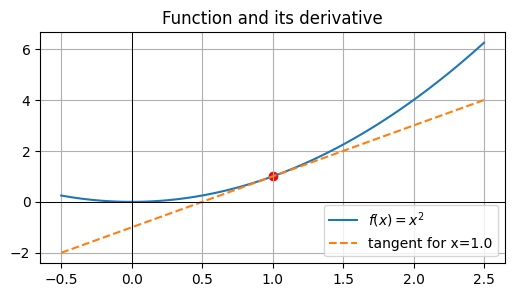

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2
def df(x):
    return 2*x

x = np.linspace(-0.5, 2.5, 100)
x0 = 1.0
y = f(x)
tangent = f(x0) + df(x0)*(x - x0)

plt.figure(figsize=(6,3))
plt.plot(x, y, label=r'$f(x)=x^2$')
plt.plot(x, tangent, '--', label=f'tangent for x={x0}')
plt.scatter([x0],[f(x0)], color='red')
plt.axhline(0, color='k', linewidth=0.7)
plt.axvline(0, color='k', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.title('Function and its derivative')
plt.show()